<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-2-Applied-Modeling/blob/master/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [x] Determine whether your problem is regression or classification.
- [x] Choose your evaluation metric.
- [x] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [x] Begin to clean and explore your data.
- [x] Choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [0]:
# Import necessary modules
import numpy as np
import pandas as pd

# Set pandas display options to view all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 80)
pd.set_option('display.width', 1000)

In [0]:
# Set file path and files for reference
file_path = '/Users/nickburkhalter/Desktop/mortality/'
fifteen = '2015_data.csv'

In [0]:
# Since the datasets are so large, it will be best to stick to just 1 year of data
# We will do all our computations using the most recent dataset available, 2015

# Create 2015 dataframe
df = pd.read_csv(file_path + fifteen)
print(df.memory_usage(index=True).sum())
print(df.shape)
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1674410048
(2718198, 77)


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,entity_condition_15,entity_condition_16,entity_condition_17,entity_condition_18,entity_condition_19,entity_condition_20,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,record_condition_15,record_condition_16,record_condition_17,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,22,10,NaN,1,M,1,2015,U,7.0,B,N,NaN,NaN,I500,230,67,NaN,22,2,11I500,61L031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,I500,L031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,20,9,NaN,1,M,2,2015,U,7.0,C,N,NaN,NaN,C349,93,27,NaN,8,8,11I469,21R042,31C349,41J189,42J90,61J449,62I251,63F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,C349,F179,I251,I469,J440,J90,R042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,24,11,NaN,4,W,6,2015,U,7.0,C,N,NaN,NaN,G309,189,52,NaN,17,1,11G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,14,6,NaN,4,S,5,2015,N,3.0,B,Y,9.0,9.0,X91,434,129,NaN,41,6,11T71,12X91,21T71,61T149,62S223,63S299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,X91,S223,S299,T149,T71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,23,11,NaN,6,W,5,2015,U,7.0,C,N,NaN,9.0,I250,214,62,NaN,21,3,11I250,21S720,61X590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,I250,S720,X590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [0]:
# Since the dataframe is 1.6GB, and my laptop has only 8GB of RAM, we'll sample a random portion
# of df to help with memory
df = df.sample(n=700000, axis=0)
print(df.memory_usage(index=True).sum())
print(df.shape)
df.head()

436800000
(700000, 77)


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,entity_condition_15,entity_condition_16,entity_condition_17,entity_condition_18,entity_condition_19,entity_condition_20,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,record_condition_15,record_condition_16,record_condition_17,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
1319040,2,NaN,2.0,1,3,F,1,73,NaN,40,20,9,NaN,1,W,7,2015,U,7.0,C,N,NaN,NaN,I609,235,70,NaN,24,2,11I609,61D696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,I609,D696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2618857,1,NaN,3.0,1,8,M,1,65,NaN,39,19,9,NaN,4,M,7,2015,U,7.0,C,N,NaN,NaN,J449,267,86,NaN,28,4,11J449,61J841,62B182,63F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,J449,B182,F179,J841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2018443,1,NaN,3.0,1,2,M,1,61,NaN,38,18,8,NaN,1,U,6,2015,U,7.0,C,N,NaN,NaN,A419,23,10,NaN,37,2,11E872,21A419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,A419,E872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,100,7
1705870,1,NaN,3.0,1,2,F,1,86,NaN,43,23,11,NaN,4,W,5,2015,U,7.0,B,N,NaN,NaN,I350,225,68,NaN,22,1,11I350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,I350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
883184,1,NaN,4.0,1,9,M,1,88,NaN,43,23,11,NaN,4,M,5,2015,U,7.0,C,N,NaN,NaN,C349,93,27,NaN,8,1,11C349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,C349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [0]:
# We will randomly split the data w/ train_test_split
# There seem to be no solid ways of splitting the data by time & I have a hunch that weekend deaths are significant
# so I want to keep that part of the data random
# We will also include a validation set for our baseline model for quick performance

# Import the proper sklearn module 
from sklearn.model_selection import train_test_split

# Split into train & test sets first
# Seed for reproduceability
X_train, X_test = train_test_split(df, train_size=0.8, test_size=0.2, 
                                  stratify=df['sex'], random_state=42)

# Split X_train into train and val sets
# Seed for reproduceability
X_train, X_val = train_test_split(X_train, train_size=0.8, test_size=0.2, 
                                 stratify=X_train['sex'], random_state=42)

# Drop target column from train, validation, & test sets and set y target vectors for each
# Our goal is to predict the sex of the individual based on the features provided ( a classification problem)
target = 'sex'
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

X_train = X_train.drop(columns=target)
X_val = X_val.drop(columns=target)
X_test = X_test.drop(columns=target)

# REMEMBER: test set will not be used until the end!
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((448000, 76), (448000,), (112000, 76), (112000,), (140000, 76), (140000,))

In [0]:
# Check if our targets were stratified correctly
print('Train stratification:\n', y_train.value_counts(normalize=True))
print('Validation stratification:\n', y_val.value_counts(normalize=True))
print('Test stratification:\n', y_test.value_counts(normalize=True))

Train stratification:
 M    0.506344
F    0.493656
Name: sex, dtype: float64
Validation stratification:
 M    0.506348
F    0.493652
Name: sex, dtype: float64
Test stratification:
 M    0.506343
F    0.493657
Name: sex, dtype: float64


In [0]:
# Calculate a baseline model for our training data by using the majority class
# This was calculated above, but for clarity we will do it again
y_train.value_counts(normalize=True)

M    0.506344
F    0.493656
Name: sex, dtype: float64

In [0]:
# If we were to guess Male for each entry, we would be correct ~50.7% of the time
from sklearn.metrics import accuracy_score

majority = y_train.mode()[0]
maj_pred = [majority] * len(y_train)
accuracy_score(y_train, maj_pred)

0.50634375

In [0]:
# From this simple glossing of the data, we see a few oddities
# First, the max age is 999 - this could either be a typo or a placeholder
# However, to fix this, we can look at the age_recode columns to figure out how old the person was
# Information on what the columns mean can be found here: https://www.cdc.gov/nchs/data/dvs/Multiple_Cause_Record_Layout_2015.pdf

# Additionally, there are a lot of null values
# However, according to the documentation, these are not absent values, but actually meaningful placeholders
# We will use the data as-is to create a basic random forest classifier
# But before we can do that, it is important to note that all columns but detail_age seem to be categorical
# They have been numerically encoded by the CDC for internal use
# We will reclass them as categorical


# Get list of all numeric categorical names
age = 'detail_age'
numeric = X_train.select_dtypes('number').columns.drop(age).tolist()

# Iterate through X_train, changing each numeric category to object type
for col in numeric:
    X_train[col] = X_train[col].astype('object')

print(X_train.shape)
X_train.dtypes

(448000, 76)


resident_status                                           object
education_1989_revision                                   object
education_2003_revision                                   object
education_reporting_flag                                  object
month_of_death                                            object
detail_age_type                                           object
detail_age                                                 int64
age_substitution_flag                                     object
age_recode_52                                             object
age_recode_27                                             object
age_recode_12                                             object
infant_age_recode_22                                      object
place_of_death_and_decedents_status                       object
marital_status                                            object
day_of_week_of_death                                      object
current_data_year        

In [0]:
# Do the same for our validation and test sets
for col in numeric:
    X_val[col] = X_val[col].astype('object')

print(X_val.shape)
X_val.dtypes

(112000, 76)


resident_status                                           object
education_1989_revision                                   object
education_2003_revision                                   object
education_reporting_flag                                  object
month_of_death                                            object
detail_age_type                                           object
detail_age                                                 int64
age_substitution_flag                                     object
age_recode_52                                             object
age_recode_27                                             object
age_recode_12                                             object
infant_age_recode_22                                      object
place_of_death_and_decedents_status                       object
marital_status                                            object
day_of_week_of_death                                      object
current_data_year        

In [0]:
for col in numeric:
    X_test[col] = X_test[col].astype('object')

print(X_test.shape)
X_test.dtypes

(140000, 76)


resident_status                                           object
education_1989_revision                                   object
education_2003_revision                                   object
education_reporting_flag                                  object
month_of_death                                            object
detail_age_type                                           object
detail_age                                                 int64
age_substitution_flag                                     object
age_recode_52                                             object
age_recode_27                                             object
age_recode_12                                             object
infant_age_recode_22                                      object
place_of_death_and_decedents_status                       object
marital_status                                            object
day_of_week_of_death                                      object
current_data_year        

In [0]:
# Create our random forest classifier
# Seed for reproduceability

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Create ML pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

# Fit to train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6935


In [0]:
# We have a lot of features to work with
# Let's do a permutation importance to see just what the most important features are

# Rerun the random forest classifier outside the pipeline
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Find the permutation importance of each column using the eli5 library
# This will help us decide which features to include/exclude
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1207 ± 0.0000,marital_status
0.0100 ± 0.0001,39_cause_recode
0.0062 ± 0.0004,education_2003_revision
0.0060 ± 0.0015,detail_age
0.0023 ± 0.0006,358_cause_recode
0.0014 ± 0.0001,icd_code_10th_revision
0.0011 ± 0.0005,place_of_death_and_decedents_status
0.0011 ± 0.0012,month_of_death
0.0011 ± 0.0012,record_condition_1
0.0009 ± 0.0003,age_recode_12


In [0]:
# Let's remove all the columns with scores <= 0
minimum_importance = 0
mask = permuter.feature_importances_ > 0
features = X_train.columns[mask]
X_train = X_train[features]


X_val = X_val[features]

X_train.shape, X_val.shape

((448000, 35), (112000, 35))

In [0]:
# Run the random forest on the new train and val sets

# Create ML pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

# Fit to train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6941964285714286


In [0]:
# Use the sklearn classifiaction report to get our precision and recall
from sklearn.metrics import classification_report

# Calculate y_pred
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           F       0.71      0.65      0.68     55289
           M       0.68      0.73      0.71     56711

    accuracy                           0.69    112000
   macro avg       0.70      0.69      0.69    112000
weighted avg       0.69      0.69      0.69    112000



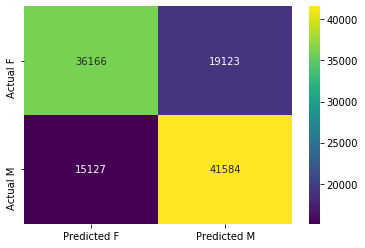

In [0]:
# Visualize our calssification report on a heatmap
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='.0f', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [0]:
# What are our predicted probabilities?
pipeline.predict_proba(X_val)

array([[0.79, 0.21],
       [0.69, 0.31],
       [0.41, 0.59],
       ...,
       [0.78, 0.22],
       [0.79, 0.21],
       [0.53, 0.47]])

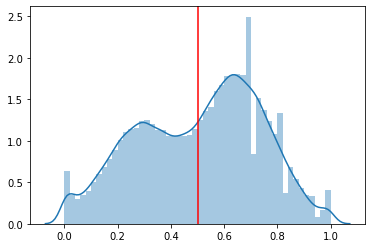

In [0]:
# What's the threshold?
y_pred_proba = pipeline.predict_proba(X_val)[:,1]

threshold = 0.50
ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red')

In [0]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba > threshold)
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.show()
    plot_confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    
interact(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.05));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…